In [5]:
import numpy as np       
import pandas as pd      



In [6]:
df = pd.read_csv("restaurant_reviews.csv")

In [7]:
df.head

<bound method NDFrame.head of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [8]:

import nltk              
import re     
nltk.download('stopwords')
from nltk.corpus import stopwords   
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
corpus = []
for i in range(0,1000):


    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(df['Review'][i]))

    review = review.lower()

    review_words = review.split()


    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]    #stopwords are the english wordswhich doesn't add much meaning to a sentence

    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    review = ' '.join(review)

    corpus.append(review)

In [10]:
corpus[0:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happier',


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)  #max_features = 1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values
     

In [13]:

from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [15]:


from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [16]:
y_pred = classifier.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("-------scores--------")
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("precision_score is : {}%".format(round(score2*100,2)))
print("recall_score is : {}%".format(round(score3*100,2)))

-------scores--------
Accuracy score is : 75.5%
precision_score is : 75.0%
recall_score is : 78.64%


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
     

In [19]:
cm

array([[70, 27],
       [22, 81]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

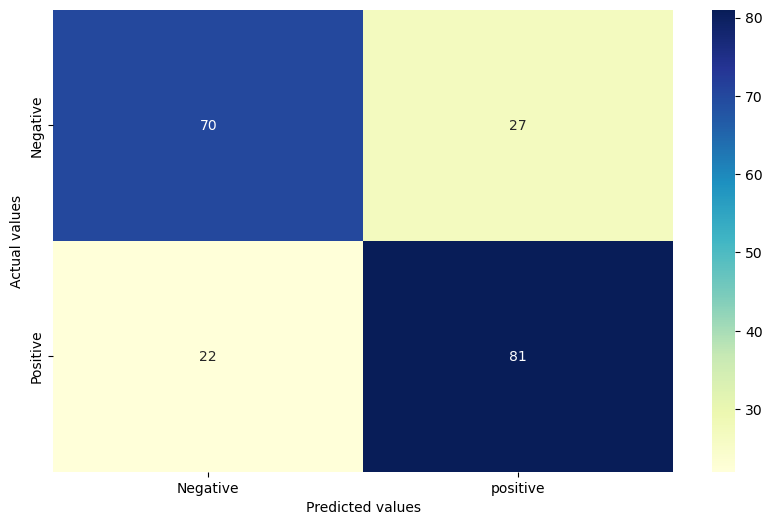

In [20]:
import matplotlib.pyplot as plt   
import seaborn as sns    
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [21]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha = {} is : {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("-------------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))

Accuracy score for alpha = 0.1 is : 77.5%
Accuracy score for alpha = 0.2 is : 78.0%
Accuracy score for alpha = 0.3 is : 77.5%
Accuracy score for alpha = 0.4 is : 77.5%
Accuracy score for alpha = 0.5 is : 76.5%
Accuracy score for alpha = 0.6 is : 76.5%
Accuracy score for alpha = 0.7 is : 76.5%
Accuracy score for alpha = 0.8 is : 75.5%
Accuracy score for alpha = 0.9 is : 75.5%
Accuracy score for alpha = 1.0 is : 75.5%
-------------------------------------------
The best accuracy is 78.0% with alpha value as 0.2


In [22]:
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [23]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review =sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [27]:

sample_review = 'The food is amazing'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review


In [28]:

sample_review = "I don't like the food"

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is Negative review!


In [29]:

sample_review = 'The food is fantastic and it has been briliantly served'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review
